In [12]:
import math
import numpy as np
import scipy
import matplotlib.pyplot as plt
from idesolver import IDESolver

from volterra import *
from probability import *
from transforms import *

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=15)
import matplotlib
matplotlib.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

### Show agreement between Laplace and Fourier Volterra inversion formulas on completely monotonic exponential kernel

In [286]:
c0 = 0
c1 = 0

t = np.linspace(0, 10, 1000)
dt = t[1] - t[0]
Nt = len(t)
lmbda_a = np.array([1, 2])
lmbda_b = np.array([1, 0.5])

K = exp_kernel(lmbda_a, lmbda_b, t)

#omega = np.linspace(-100, 100, 1000)
#K_ifft = np.real(1/(2*math.pi)*2*lmbda_b*lmbda_a/(lmbda_a**2 + omega**2))

zeta0, zeta1, mu_alpha, mu_beta = B_R_discrete(-c0, c1, lmbda_a, lmbda_b)
print(zeta0, zeta1)
#zeta0, zeta1, mu_ifft_alpha, mu_ifft_beta = B_R_discrete(c0, c1, omega, K_ifft)
#print(zeta0, zeta1)

-8.772981689857207 6.579736267392906


In [287]:
mu_alpha

array([1.66666667])

In [288]:
print(np.linalg.norm(mu_ifft_alpha + np.flip(mu_ifft_alpha)))
print(np.linalg.norm(mu_ifft_beta - np.flip(mu_ifft_beta)))

4.790014491657869e-13
4.0739884308030975e-11


In [289]:
J = exp_kernel(mu_alpha, mu_beta, t)
J2 = np.sum(mu_ifft_beta[:, None]*np.cos(mu_ifft_alpha[:, None]*t[None, :]), axis=0)

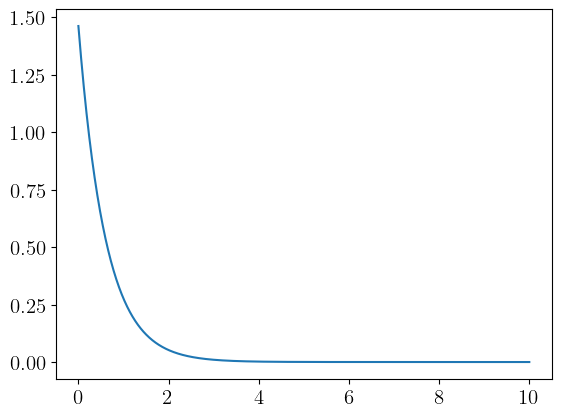

In [290]:
plt.plot(t, J)
#plt.plot(t, J2)
plt.show()

### Perform deconvolution using numerical quadrature

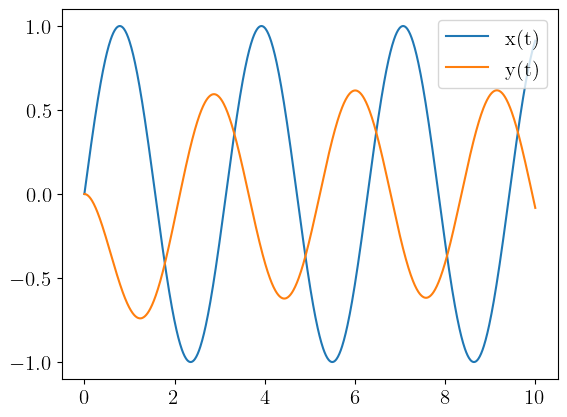

In [291]:
x = np.sin(2*t)
xdot = 2*np.cos(2*t)
y = c1*xdot + c0*x - conv_trap(K, x, t)

plt.plot(t, x)
plt.plot(t, y)
plt.legend(["x(t)", "y(t)"])
plt.show()

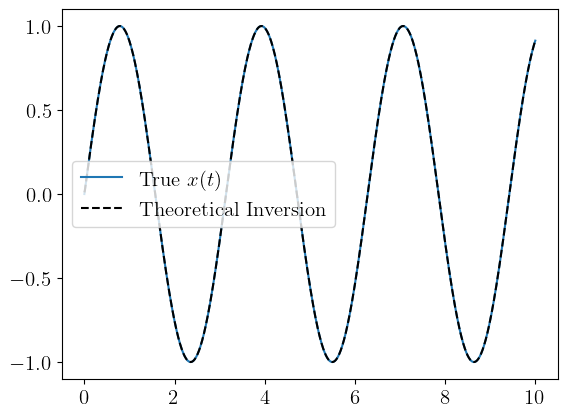

0.00045985545930124185


In [292]:
ydot = np.gradient(y, dt)
x_solve = (-zeta1*ydot + zeta0*y + conv_trap(J, y, t))/math.pi**2

plt.plot(t, x)
plt.plot(t, x_solve, color="black", linestyle="dashed")
plt.legend(["True $x(t)$", "Theoretical Inversion"])
plt.show()

print(np.linalg.norm(x - x_solve) / np.linalg.norm(x))

In [224]:
mu_beta/math.pi**2

array([1.])

In [226]:
mu_alpha

array([2.])

In [227]:
zeta0/math.pi**2

-1.0

In [ ]:
assert(c1 == 0)

x_solve = solve_volterra_second_type(K, c0, y, t)

plt.plot(t, x)
plt.plot(t, x_solve, color="black", linestyle="dashed")
plt.legend(["True $x(t)$", "Quadrature Inversion"])
plt.show()

print(np.linalg.norm(x - x_solve) / np.linalg.norm(x))

AssertionError: 

In [67]:
assert(c1 != 0)

y_interp = lambda s: np.interp(s, t, y)

solver = IDESolver(
    x = t,
    y_0 = 0,
    c = lambda x, y: c0/c1*y - y_interp(x)/c1,
    d = lambda x: -1/c1,
    k = lambda x, s: np.sum(lmbda_b*np.exp(-lmbda_a*(x-s))),
    f = lambda y: y,
    lower_bound = lambda x: 0,
    upper_bound = lambda x: x,
)

solver.solve()

/Users/georgestepaniants/opt/anaconda3/lib/python3.9/site-packages/idesolver/idesolver.py:292: IDEConvergenceWarning: Error increased on iteration 0
  warnings.warn(
/Users/georgestepaniants/opt/anaconda3/lib/python3.9/site-packages/idesolver/idesolver.py:292: IDEConvergenceWarning: Error increased on iteration 1
  warnings.warn(
/Users/georgestepaniants/opt/anaconda3/lib/python3.9/site-packages/idesolver/idesolver.py:292: IDEConvergenceWarning: Error increased on iteration 22
  warnings.warn(
/Users/georgestepaniants/opt/anaconda3/lib/python3.9/site-packages/idesolver/idesolver.py:292: IDEConvergenceWarning: Error increased on iteration 24
  warnings.warn(
/Users/georgestepaniants/opt/anaconda3/lib/python3.9/site-packages/idesolver/idesolver.py:292: IDEConvergenceWarning: Error increased on iteration 25
  warnings.warn(
/Users/georgestepaniants/opt/anaconda3/lib/python3.9/site-packages/idesolver/idesolver.py:292: IDEConvergenceWarning: Error increased on iteration 28
  warnings.warn(


KeyboardInterrupt: 